## Load IMDb Moview Review Data

In [2]:
import pandas as pd
df = pd.read_csv('movie_data.csv')
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


## Preprocessing
1. Remove HTML tags
2. Remove extra whitespaces
3. Lowercase all texts
4. Remove stopwords
5. Lemmatization

In [3]:
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unidecode

#### Remove HTML Tags
If the reviews or texts are web scraped, chances are they will contain some HTML tags. Since these tags are not useful for our NLP tasks, it is better to remove them.

In [4]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

df["review"].apply(strip_html_tags)

0        I went and saw this movie last night after bei...
1        Actor turned director Bill Paxton follows up h...
2        As a recreational golfer with some knowledge o...
3        I saw this film in a sneak preview, and it is ...
4        Bill Paxton has taken the true story of the 19...
5        I saw this film on September 1st, 2005 in Indi...
6        Maybe I'm reading into this too much, but I wo...
7        I felt this film did have many good qualities....
8        This movie is amazing because the fact that th...
9        "Quitting" may be as much about exiting a pre-...
10       I loved this movie from beginning to end.I am ...
11       I was fortunate to attend the London premier o...
12       I first saw this movie on IFC. Which is a grea...
13       I must say, every time I see this movie, I am ...
14       My wife is a mental health therapist and we wa...
15       I saw this film at the Rotterdam International...
16       "Night of the Hunted" stars French porn star B.

#### Remove Extra Whitespaces

In [5]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

df["review"].apply(remove_whitespace)

0        I went and saw this movie last night after bei...
1        Actor turned director Bill Paxton follows up h...
2        As a recreational golfer with some knowledge o...
3        I saw this film in a sneak preview, and it is ...
4        Bill Paxton has taken the true story of the 19...
5        I saw this film on September 1st, 2005 in Indi...
6        Maybe I'm reading into this too much, but I wo...
7        I felt this film did have many good qualities....
8        This movie is amazing because the fact that th...
9        "Quitting" may be as much about exiting a pre-...
10       I loved this movie from beginning to end.I am ...
11       I was fortunate to attend the London premier o...
12       I first saw this movie on IFC. Which is a grea...
13       I must say, every time I see this movie, I am ...
14       My wife is a mental health therapist and we wa...
15       I saw this film at the Rotterdam International...
16       "Night of the Hunted" stars French porn star B.

### Convert all characters to lowercase


In [6]:
def to_lowercase(text):
    return text.lower()

df["review"].apply(to_lowercase)

0        i went and saw this movie last night after bei...
1        actor turned director bill paxton follows up h...
2        as a recreational golfer with some knowledge o...
3        i saw this film in a sneak preview, and it is ...
4        bill paxton has taken the true story of the 19...
5        i saw this film on september 1st, 2005 in indi...
6        maybe i'm reading into this too much, but i wo...
7        i felt this film did have many good qualities....
8        this movie is amazing because the fact that th...
9        "quitting" may be as much about exiting a pre-...
10       i loved this movie from beginning to end.i am ...
11       i was fortunate to attend the london premier o...
12       i first saw this movie on ifc. which is a grea...
13       i must say, every time i see this movie, i am ...
14       my wife is a mental health therapist and we wa...
15       i saw this film at the rotterdam international...
16       "night of the hunted" stars french porn star b.

#### Remove Stop Words

In [7]:
def remove_stopwords(text, lang='english'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang)
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)

df["review"].apply(remove_stopwords)

0        went saw movie last night coaxed friends mine ...
1        Actor turned director Bill Paxton follows prom...
2        recreational golfer knowledge sport 's history...
3        saw film sneak preview , delightful . cinemato...
4        Bill Paxton taken true story 1913 US golf open...
5        saw film September 1st , 2005 Indianapolis . o...
6        Maybe 'm reading much , wonder much hand Hongs...
7        felt film many good qualities . cinematography...
8        movie amazing fact real people portray real li...
9        `` Quitting '' may much exiting pre-ordained i...
10       loved movie beginning end.I musician let drugs...
11       fortunate attend London premier film . fan Bri...
12       first saw movie IFC . great network way see un...
13       must say , every time see movie , deeply touch...
14       wife mental health therapist watched beginning...
15       saw film Rotterdam International Film Festival...
16       `` Night Hunted '' stars French porn star Brig.

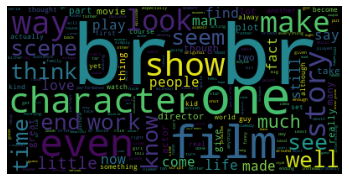

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(df["review"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Build a Classifer
From the IMDb dataset, divide it into test and training sets of 25000 each

In [10]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

We use TfidTransformer to convert the text corpus into the feature vectors, we restrict the maximum features to 10000.

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 73822) (25000, 73822)


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

svc = SVC(kernel='linear')
svc.fit(train_vectors, y_train)

predictions = svc.predict(test_vectors)
print("\nF1 test score for SVC: {:.2f}".format(f1_score(y_test, predictions)))


F1 test score for SVC: 0.88


In [11]:
from sklearn.metrics import classification_report

print (classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12740
           1       0.87      0.89      0.88     12260

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

